<a href="https://colab.research.google.com/github/rishrules/rish-s-Projects/blob/main/Air_Quality_in_India_Research_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Processing

In [ ]:
# loading the data from csv file to Pandas DataFrame
city_day = pd.read_csv('/content/city_day.csv')

In [ ]:
# first 5 rows of the dataframe
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
# number of data points & number of features
city_day.shape

(29531, 16)

In [ ]:
#getting some information about the dataset
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


Categorical Features:


1.   City
2.   Date
1.   AQI Bucket





In [ ]:
# checking for missing values
city_day.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

**Handling Missing Values**

Mean --> average

Mode --> more repeated value

In [ ]:
# mean value of "PM2.5" column
city_day['PM2.5'].mean()

67.45057794890306

In [ ]:
# mean value of "PM10" column
city_day['PM10'].mean()

118.12710293078135

In [ ]:
# mean value of "NO" column
city_day['NO'].mean()

17.574729662029362

In [ ]:
# mean value of "NO2" column
city_day['NO2'].mean()

28.560659061126955

In [ ]:
# mean value of "NOx" column
city_day['NOx'].mean()

32.30912333307031

In [ ]:
# mean value of "NH3" column
city_day['NH3'].mean()

23.48347601937197

In [ ]:
# mean value of "CO" column
city_day['CO'].mean()

2.2485982090856145

In [ ]:
# mean value of "SO2" column
city_day['SO2'].mean()

14.53197725590996

In [ ]:
# mean value of "O3" column
city_day['O3'].mean()

34.49143047551845

In [ ]:
# mean value of "Benzene" column
city_day['Benzene'].mean()

3.280840304500585

In [ ]:
# mean value of "Toluene" column
city_day['Toluene'].mean()

8.700972080037227

In [ ]:
# mean value of "Xylene" column
city_day['Xylene'].mean()

3.0701278234985114

In [ ]:
# mean value of "AQI" column
city_day['AQI'].mean()

166.4635814889336

In [ ]:
# mode of "AQI_Bucket" column
city_day['AQI_Bucket'].mode()

0    Moderate
dtype: object

In [ ]:
# filling the missing values in "PM2.5" with "Mean" value
city_day['PM2.5'].fillna(city_day['PM2.5'].mean(), inplace=True)

In [ ]:
# filling the missing values in "PM10" with "Mean" value
city_day['PM10'].fillna(city_day['PM10'].mean(), inplace=True)

In [ ]:
# filling the missing values in "NO" with "Mean" value
city_day['NO'].fillna(city_day['NO'].mean(), inplace=True)

In [ ]:
# filling the missing values in "NO2" with "Mean" value
city_day['NO2'].fillna(city_day['NO2'].mean(), inplace=True)

In [ ]:
# filling the missing values in "NOx" with "Mean" value
city_day['NOx'].fillna(city_day['NOx'].mean(), inplace=True)

In [ ]:
# filling the missing values in "NH3" with "Mean" value
city_day['NH3'].fillna(city_day['NH3'].mean(), inplace=True)

In [ ]:
# filling the missing values in "CO" with "Mean" value
city_day['CO'].fillna(city_day['CO'].mean(), inplace=True)

In [ ]:
# filling the missing values in "SO2" with "Mean" value
city_day['SO2'].fillna(city_day['SO2'].mean(), inplace=True)

In [ ]:
# filling the missing values in "O3" with "Mean" value
city_day['O3'].fillna(city_day['O3'].mean(), inplace=True)

In [ ]:
# filling the missing values in "Benzene" with "Mean" value
city_day['Benzene'].fillna(city_day['Benzene'].mean(), inplace=True)

In [ ]:
# filling the missing values in "Toluene" with "Mean" value
city_day['Toluene'].fillna(city_day['Toluene'].mean(), inplace=True)

In [ ]:
# filling the missing values in "Xylene" with "Mean" value
city_day['Xylene'].fillna(city_day['Xylene'].mean(), inplace=True)

In [ ]:
# filling the missing values in "AQI" with "Mean" value
city_day['AQI'].fillna(city_day['AQI'].mean(), inplace=True)

In [ ]:
# filling the missing values in "AQI_Bucket" column with Mode
mode_of_AQI_Bucket = city_day.pivot_table(values='AQI_Bucket', columns='City', aggfunc=(lambda x: x.mode()[0]))

In [ ]:
print(mode_of_AQI_Bucket)

City       Ahmedabad Aizawl     Amaravati      Amritsar     Bengaluru  \
AQI_Bucket    Severe   Good  Satisfactory  Satisfactory  Satisfactory   

City          Bhopal Brajrajnagar    Chandigarh       Chennai    Coimbatore  \
AQI_Bucket  Moderate     Moderate  Satisfactory  Satisfactory  Satisfactory   

City        ... Jorapokhar         Kochi       Kolkata   Lucknow  \
AQI_Bucket  ...   Moderate  Satisfactory  Satisfactory  Moderate   

City              Mumbai     Patna Shillong   Talcher Thiruvananthapuram  \
AQI_Bucket  Satisfactory  Moderate     Good  Moderate       Satisfactory   

City       Visakhapatnam  
AQI_Bucket      Moderate  

[1 rows x 26 columns]


In [ ]:
miss_values = city_day['AQI_Bucket'].isnull()

In [ ]:
print(miss_values)

0         True
1         True
2         True
3         True
4         True
         ...  
29526    False
29527    False
29528    False
29529    False
29530    False
Name: AQI_Bucket, Length: 29531, dtype: bool


In [ ]:
city_day.loc[miss_values, 'AQI_Bucket'] = city_day.loc[miss_values,'City'].apply(lambda x: mode_of_AQI_Bucket[x])

In [ ]:
# checking for missing values
city_day.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

Data Analysis

In [ ]:
city_day.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,29531.000000,29531.000000,29531.00000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,67.450578,118.127103,17.57473,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,59.414476,71.500953,21.35922,22.941051,29.317936,20.711370,6.715753,16.909088,20.163443,14.226364,17.034769,3.932426,129.064348
min,0.040000,0.010000,0.02000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,32.150000,79.315000,6.21000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,2.000000,88.000000
50%,58.030000,118.127103,11.53000,25.240000,27.550000,23.483476,0.950000,10.480000,34.491430,1.840000,6.930000,3.070128,138.000000
75%,72.450000,118.127103,17.57473,34.665000,36.015000,23.483476,1.710000,14.531977,42.730000,3.280840,8.700972,3.070128,179.000000
max,949.990000,1000.000000,390.68000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


Numerical Features

In [ ]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


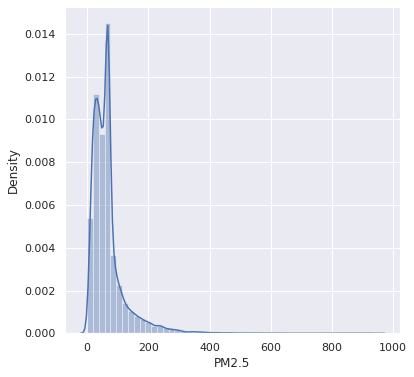

In [ ]:
# PM2.5 distribution
plt.figure(figsize=(6,6))
sns.distplot(city_day['PM2.5'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


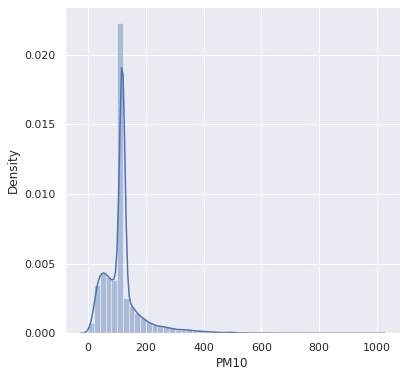

In [ ]:
# PM10 distribution
plt.figure(figsize=(6,6))
sns.distplot(city_day['PM10'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


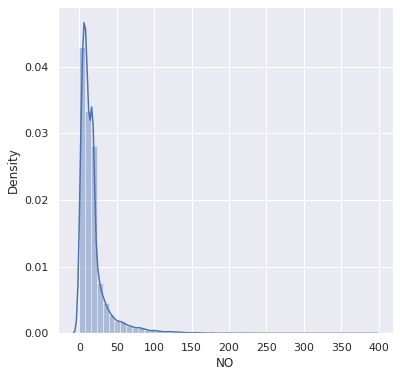

In [ ]:
# NO distribution
plt.figure(figsize=(6,6))
sns.distplot(city_day['NO'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


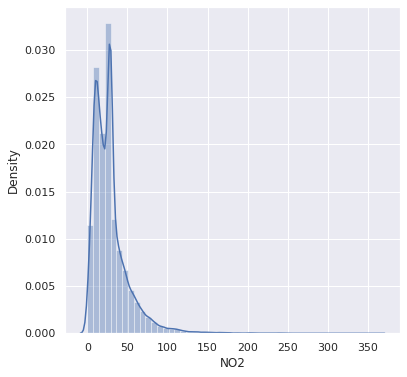

In [ ]:
# NO2 distribution
plt.figure(figsize=(6,6))
sns.distplot(city_day['NO2'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


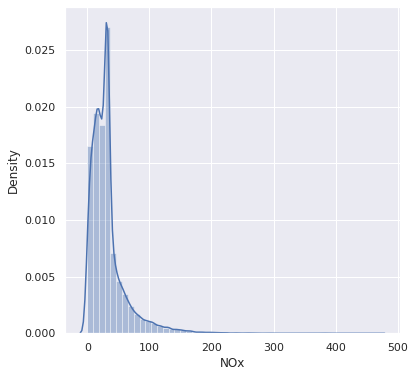

In [ ]:
# NOx distribution
plt.figure(figsize=(6,6))
sns.distplot(city_day['NOx'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


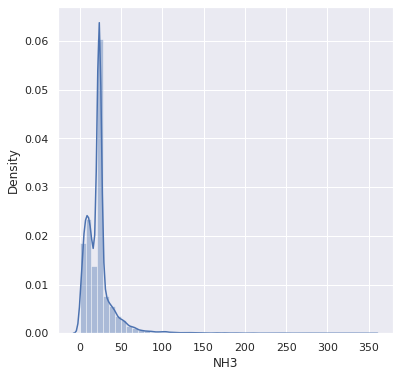

In [ ]:
# NH3 distribution
plt.figure(figsize=(6,6))
sns.distplot(city_day['NH3'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


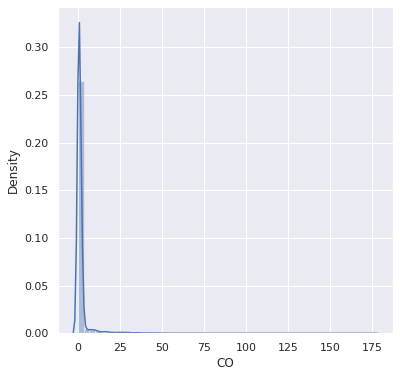

In [ ]:
# CO distribution
plt.figure(figsize=(6,6))
sns.distplot(city_day['CO'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


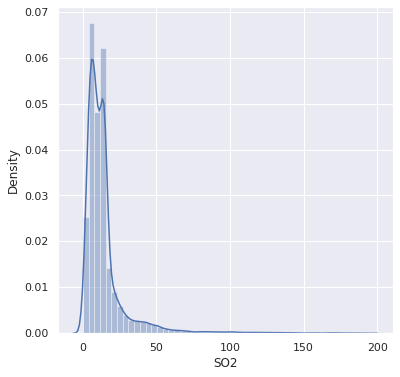

In [ ]:
# SO2 distribution
plt.figure(figsize=(6,6))
sns.distplot(city_day['SO2'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


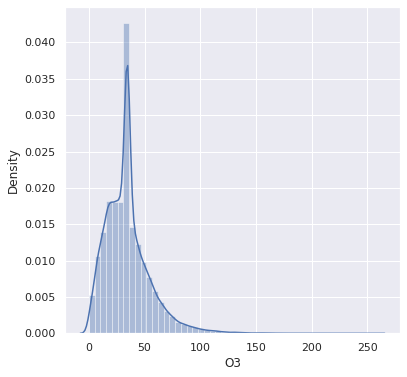

In [ ]:
# O3 distribution
plt.figure(figsize=(6,6))
sns.distplot(city_day['O3'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


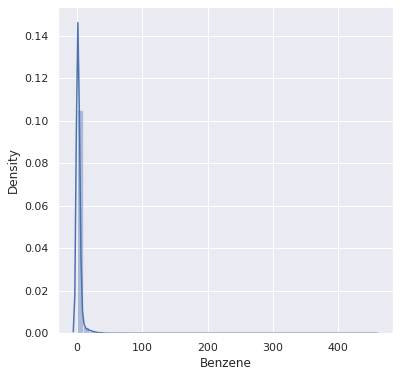

In [ ]:
# Benzene distribution
plt.figure(figsize=(6,6))
sns.distplot(city_day['Benzene'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


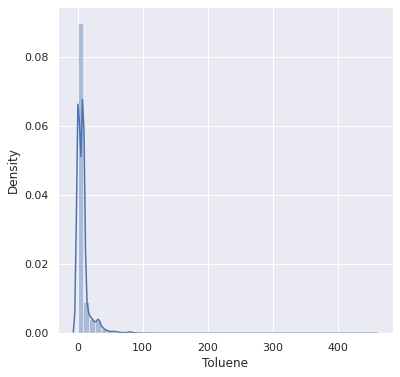

In [ ]:
# Toluene distribution
plt.figure(figsize=(6,6))
sns.distplot(city_day['Toluene'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


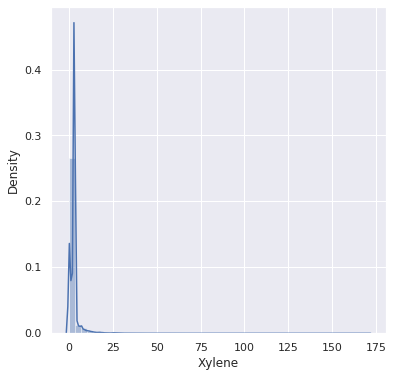

In [ ]:
# Xylene distribution
plt.figure(figsize=(6,6))
sns.distplot(city_day['Xylene'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


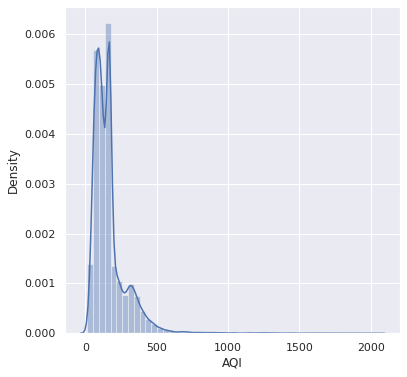

In [ ]:
# AQI distribution
plt.figure(figsize=(6,6))
sns.distplot(city_day['AQI'])
plt.show()

Categorical Features

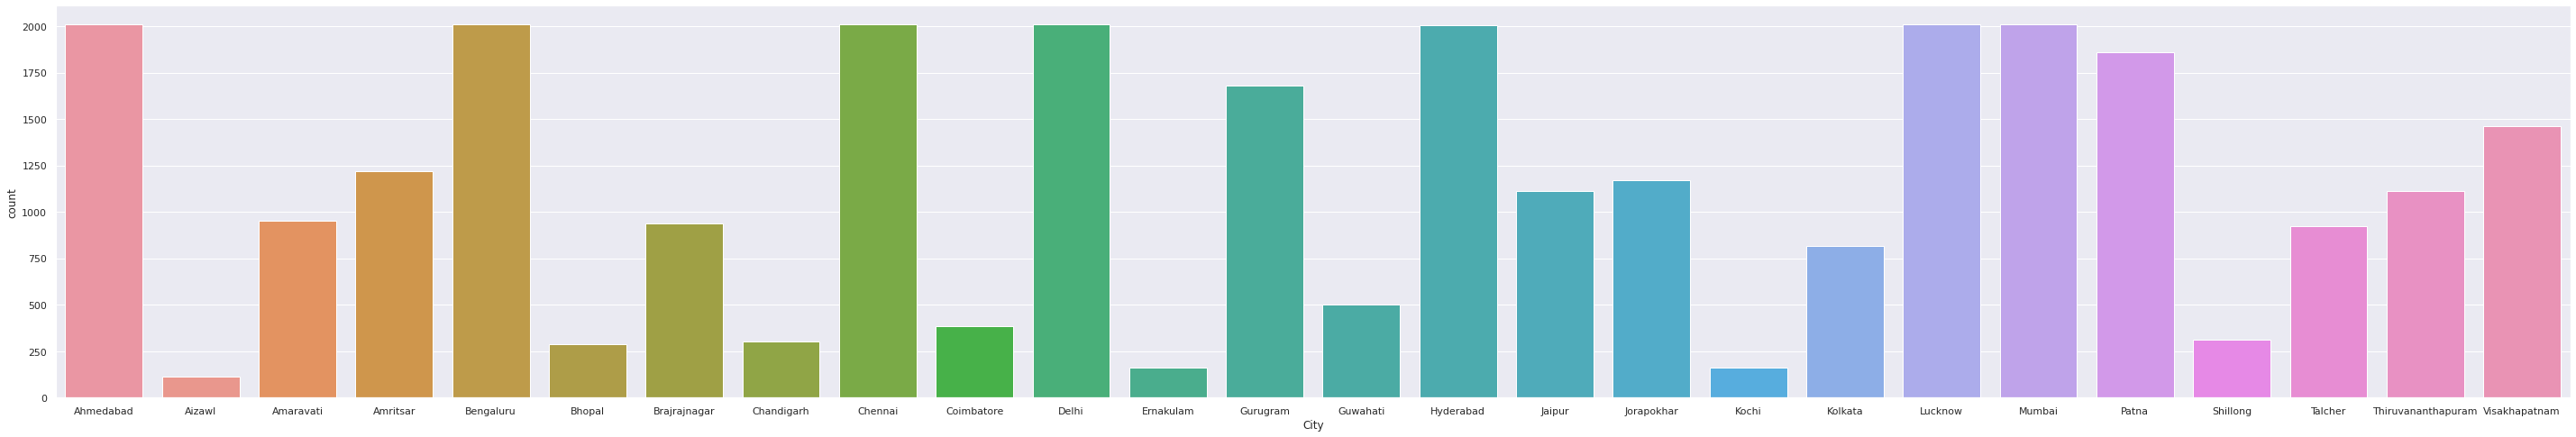

In [ ]:
# City column
plt.figure(figsize=(50,8))
sns.countplot(x='City', data=city_day)
plt.show()

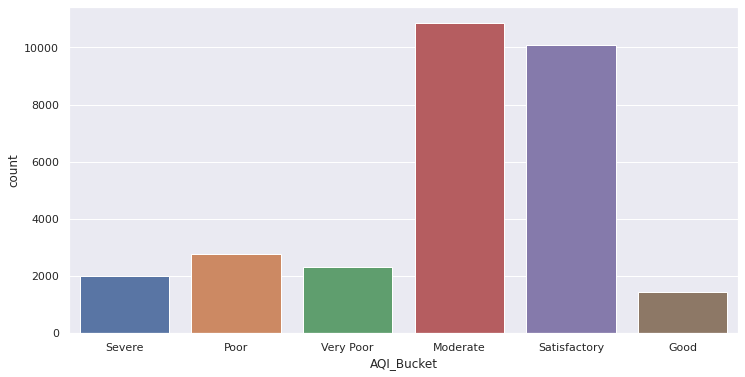

In [ ]:
# AQI_Bucket column
plt.figure(figsize=(12,6))
sns.countplot(x='AQI_Bucket', data=city_day)
plt.show()

Data Pre-Processing

In [ ]:
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581,Severe
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581,Severe
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581,Severe
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581,Severe
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581,Severe


Label Encoding

In [ ]:
encoder = LabelEncoder()

In [ ]:
city_day['City'] =encoder.fit_transform(city_day['City'])
city_day['Date'] =encoder.fit_transform(city_day['Date'])
city_day['AQI_Bucket'] =encoder.fit_transform(city_day['AQI_Bucket'])

In [ ]:
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581,4
1,0,1,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581,4
2,0,2,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581,4
3,0,3,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581,4
4,0,4,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581,4


Splitting features and Target

In [ ]:
X = city_day.drop(columns='AQI', axis=1)
Y = city_day['AQI']

In [ ]:
print(X)

       City  Date      PM2.5        PM10     NO    NO2    NOx        NH3  \
0         0     0  67.450578  118.127103   0.92  18.22  17.15  23.483476   
1         0     1  67.450578  118.127103   0.97  15.69  16.46  23.483476   
2         0     2  67.450578  118.127103  17.40  19.30  29.70  23.483476   
3         0     3  67.450578  118.127103   1.70  18.48  17.97  23.483476   
4         0     4  67.450578  118.127103  22.10  21.42  37.76  23.483476   
...     ...   ...        ...         ...    ...    ...    ...        ...   
29526    25  2004  15.020000   50.940000   7.68  25.06  19.54  12.470000   
29527    25  2005  24.380000   74.090000   3.42  26.06  16.53  11.990000   
29528    25  2006  22.910000   65.730000   3.45  29.53  18.33  10.710000   
29529    25  2007  16.640000   49.970000   4.05  29.26  18.80  10.030000   
29530    25  2008  15.000000   66.000000   0.40  26.85  14.05   5.200000   

          CO    SO2      O3  Benzene    Toluene    Xylene  AQI_Bucket  
0       0.92  2

In [ ]:
print(Y)

0        166.463581
1        166.463581
2        166.463581
3        166.463581
4        166.463581
            ...    
29526     41.000000
29527     70.000000
29528     68.000000
29529     54.000000
29530     50.000000
Name: AQI, Length: 29531, dtype: float64


Splitting the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(29531, 15) (23624, 15) (5907, 15)


Machine Learning Model Training

XGBoost Regressor

In [ ]:
regressor = XGBRegressor()

In [ ]:
regressor.fit(X_train, Y_train)

[10:23:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation

In [ ]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [ ]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [ ]:
print('R Squared value = ', r2_train)

R Squared value =  0.9289822400852873


In [ ]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [ ]:
print('R Squared value = ', r2_test)

R Squared value =  0.9173539959272169
